In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from collections import Counter

In [2]:
# read the data
df = pd.read_csv('all_stocks_5yr.csv')

# shape and data types of the data
print("Shape of our data is: ", df.shape)
print()

# type of each data
print("Data type is: ")

dType = pd.DataFrame(df.dtypes, columns = ['Type']) 

dType

Shape of our data is:  (619040, 7)

Data type is: 


,Type
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [4]:
# 1. Clean the data

In [5]:
# ** Missing data **

In [6]:
# Display Column with missing value 
print("Number of missing data per column: ")
df.isnull().sum()

Number of missing data per column: 


date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

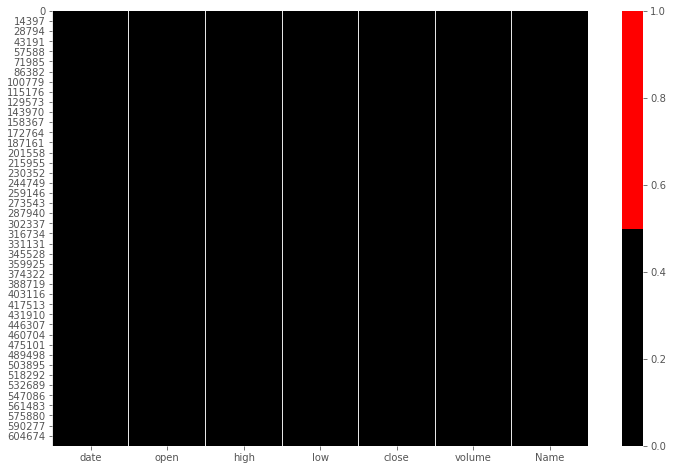

In [7]:
# Visualization: number of missing value is in red, black is not missing
sns.heatmap(df[df.columns[0:7]].isnull(), cmap=sns.color_palette(['#000000', '#FF0000']))

# Notice that open has 11 missing value and high and low all have the same 8 missing values. It's such a small 
# value that we can't see it in the visualization below

In [8]:
# To handle with missing data, we decide to impute the missing data with the average value from the data 
# of the same feature that's not missing. There are 619040 different rows and for those 3 sections there are 
# only less than 12 missing values. It's such a small number that the data won't be affect at all even if we 
# impute it
df['open'] = df['open'].fillna(df['open'].median())
df['high'] = df['high'].fillna(df['high'].median())
df['low'] = df['low'].fillna(df['low'].median())

In [9]:
# Display Column with missing value after handling missing values
print("Number of missing data per column after handling missing values: ")
df.isnull().sum()

Number of missing data per column after handling missing values: 


date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
# ** Outliers **

In [11]:
# Observing from our data, we can see that there are 5 columns we need to check for outliers. They are: 
# open, high, low, close, and volume

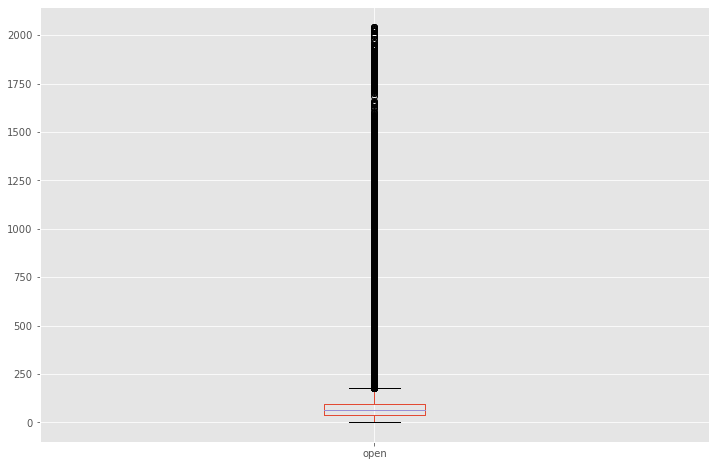

In [12]:
# We'll start with open. There seems to be no outliers
df.boxplot(column=['open'])

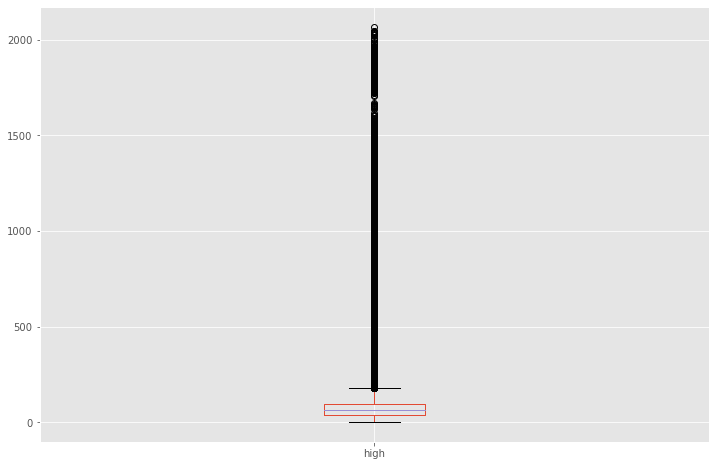

In [13]:
# Next is high. There seems to be no outliers
df.boxplot(column=['high'])

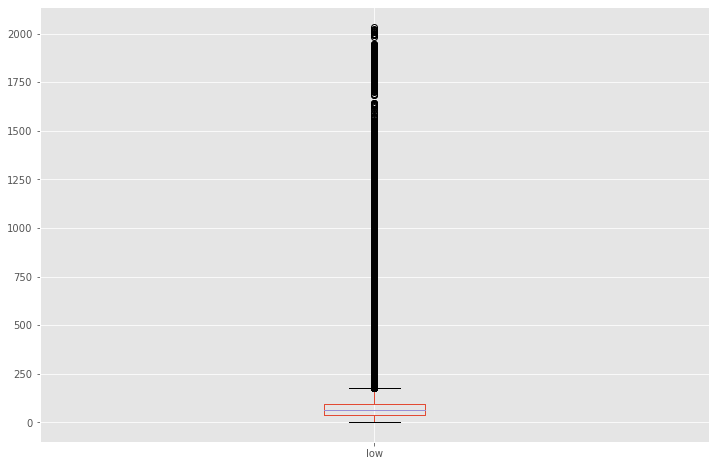

In [14]:
# Next is high. There seems to be no outliers
df.boxplot(column=['low'])

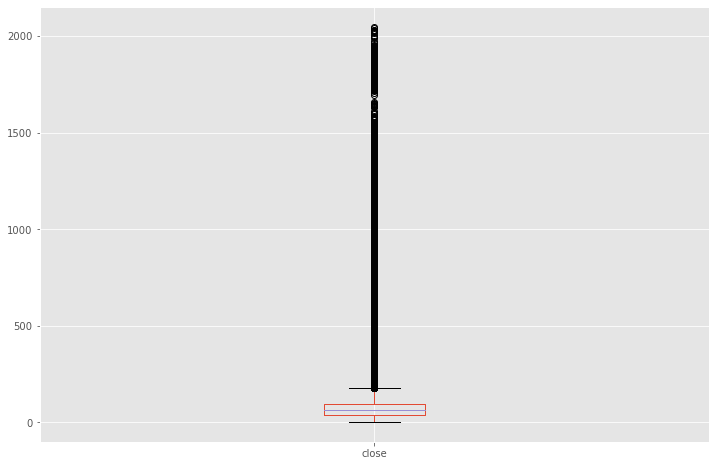

In [15]:
# Next is close. There seems to be no outliers
df.boxplot(column=['close'])

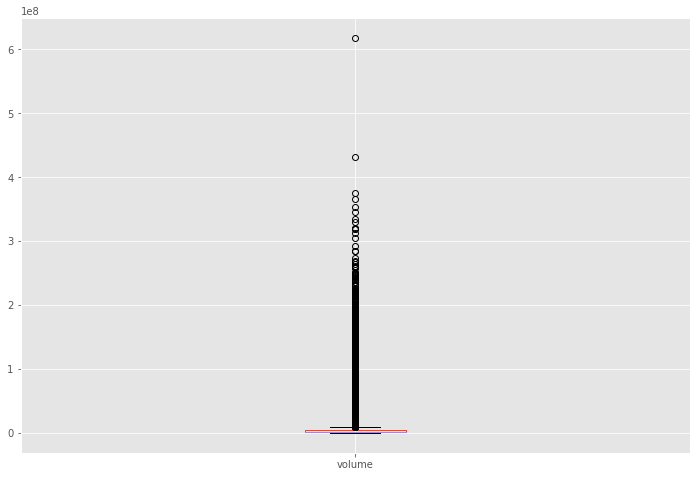

In [16]:
# Next is volumn.
df.boxplot(column=['volume'])

In [17]:
# Seems like we have an outlier. We can look at the descriptive statistic to check what that outlier is
df['volume'].describe()

count    6.190400e+05
mean     4.321823e+06
std      8.693610e+06
min      0.000000e+00
25%      1.070320e+06
50%      2.082094e+06
75%      4.284509e+06
max      6.182376e+08
Name: volume, dtype: float64

In [18]:
# As you can see, the maximum of 6.182376e+08 is our outlier because 75% quartile is only 4.284509e+06
# However, we decide to keep with outlier because it's an important piece to why the volume of the stock
# spike in a certain day, which can indicate good news and bad news about the individual stock

In [19]:
# ** Noisy data **
# First, we will check for repetitive data. I want to find columns that have more than 90% row value being the same
for col in df.columns:
    if (df[col].value_counts(dropna=False)/len(df.index)).iloc[0] > 0.9:
        print('{0}: {1:.5f}%'.format(col, (df[col].value_counts(dropna=False)/len(df.index)).iloc[0]*100), "of rows being the same")
        print()
        
# Nothing got printed, which means more than 90% of the data are different

In [20]:
# Second, we will check for irrelevant value. we have skimmed through all the features and see that 
# high and low don't really provide any valuable information for our project. They are, in our opinion, irrelevant. 
# For this project, we only interest in the open and close value of a stock to explain why it goes up or down at 
# the end of the day
df = df.drop(['high', 'low'], axis=1)

# Now we only have 5 columns
print("Shape of our data is: ", df.shape)
print()

Shape of our data is:  (619040, 5)



In [21]:
# Third, we will check for duplicated data by checking if there's any duplicate date and name together because 
# date and name together shoule be unique as it's describing a stock at a certain date
if df[df.duplicated(subset=['Name','date'])].empty:
    print("There's no duplicated row")
else:
    print("There're duplicated rows")
    
# Seems like we have no duplicated row

There's no duplicated row


In [22]:
# ** Inconsistent Data **

In [23]:
# First, inconsistent usage of upper and lower cases in categorical values is a common mistake. So, I'm going to
# put all letters to upper cases
df['Name'] = df['Name'].str.upper()

In [24]:
# Second, column date doesn't have the correct data format so I'm going to convert their type frome 
# object to datetime for easier analysis later

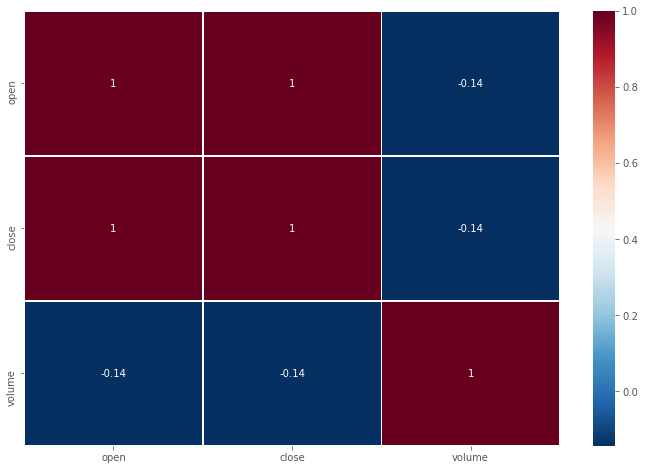

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# we check for correlation between the features using the Pearson Correlation Coefficient
corr = df.corr(method='pearson')

# print the correlation table
corr

# we print the heatmap of the correaltion table
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
cmap='RdBu_r', annot=True, linewidth=0.5)

# The dark maroon cells represent highly correlated features of our dataset

Stock Name: amgn


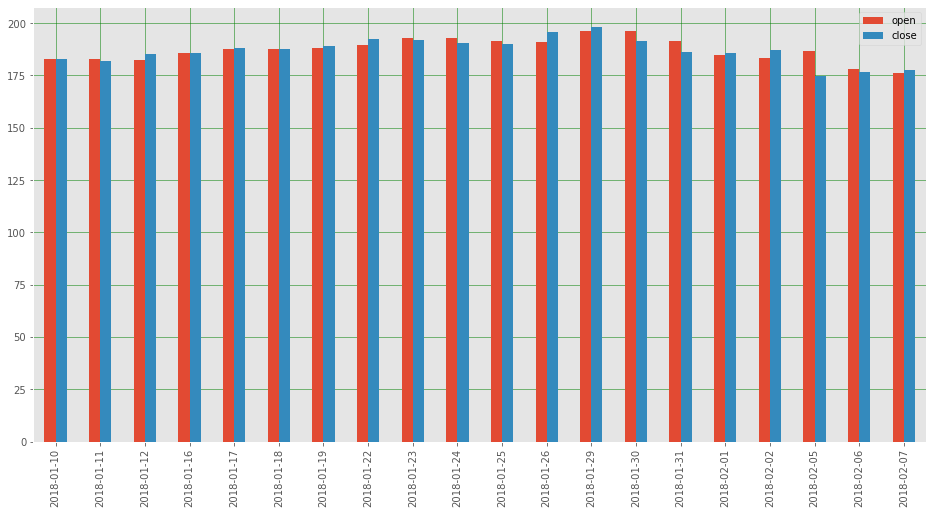

In [26]:
# We design a function to visualize the independent and dependent variables and plot them for the stock

def OpenClosePlot(stock, name):
    stock_df=stock[['date','open','close']]
    
    #Plot Open vs Close
    tickvalues = range(0,20)
    stock_df[['open','close']].tail(20).plot(kind='bar',figsize=(16,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.xticks(tickvalues, stock.date[len(stock)-20:])
    plt.show()
    
Stock = input("Stock Name: ").upper()
stock_df = df.loc[df['Name'] == Stock]
OpenClosePlot(stock_df, Stock)

In [27]:
# Model training and testing 
stock_df['date'] = pd.to_datetime(stock_df['date'], format='%Y-%m-%d')

stock_df['year']=stock_df['date'].dt.year
stock_df['month']=stock_df['date'].dt.month
stock_df['day']=stock_df['date'].dt.day

stock_df = stock_df[['day', 'month', 'year', 'open', 'close']]
stock_df.head(10)

X = stock_df.iloc[:,stock_df.columns !='close']
Y= stock_df.iloc[:, 4]

Y = Y.reset_index(drop = True)

# X = X.set_index(X['day'] + X['month'] + X['year'])
# X

K-Fold Accuracy:  99.42777021462138
Score Accuracy:  0.9944887855030116
Mean absolute error = 1.41
Mean squared error = 3.71
Median absolute error = 1.03
Explain variance score = 0.99
R2 score = 0.99


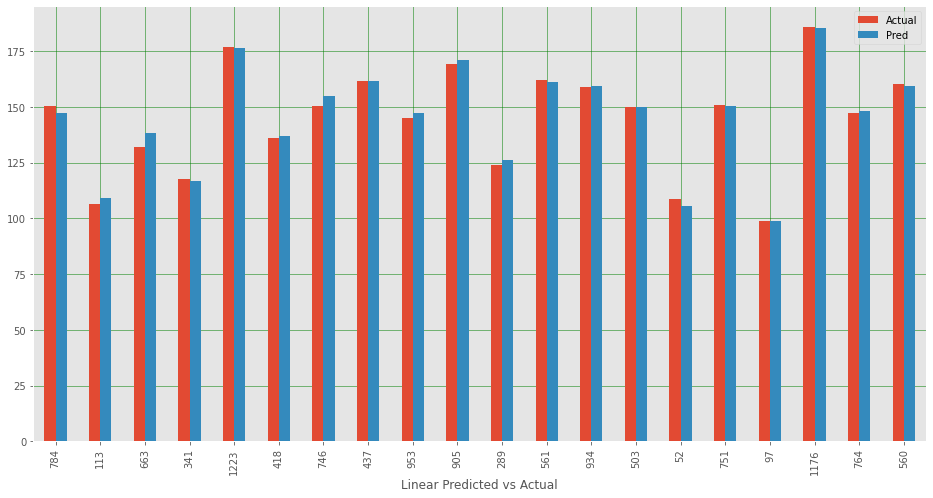

In [28]:
# We train the model after testing and splitting the data 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
import sklearn.metrics as sm

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

# Use linear regression to fit the training data
model=LinearRegression()
model.fit(x_train,y_train)

# predict the values using k-fold
y_pred=model.predict(x_test)
kfold = model_selection.KFold(n_splits=5)
results_kfold = model_selection.cross_val_score(model, x_test, y_test, cv=kfold)
print("K-Fold Accuracy: ", results_kfold.mean()*100)

print("Score Accuracy: ", model.score(x_test, y_test))

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

plot=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Linear Predicted vs Actual")
plt.show()

K-Fold Accuracy:  98.68568551726746
Score Accuracy:  0.9932669296352159
Mean absolute error = 1.63
Mean squared error = 4.54
Median absolute error = 1.33
Explain variance score = 0.99
R2 score = 0.99


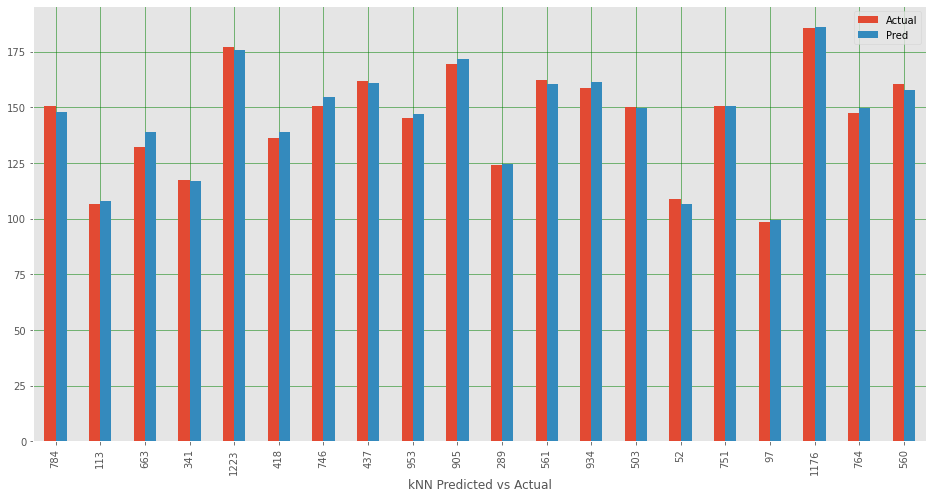

In [29]:
# KNN model training 
from sklearn.neighbors import KNeighborsRegressor

knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

knn_kfold = model_selection.KFold(n_splits=20)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("K-Fold Accuracy: ", results_kfold.mean()*100)

print("Score Accuracy: ", knn_model.score(x_test, y_test))

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_knn_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_knn_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_knn_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_knn_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_knn_pred), 2))

plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("kNN Predicted vs Actual")
plt.show()

Score Accuracy:  0.994264659399689
Mean absolute error = 1.44
Mean squared error = 3.86
Median absolute error = 0.97
Explain variance score = 0.99
R2 score = 0.99


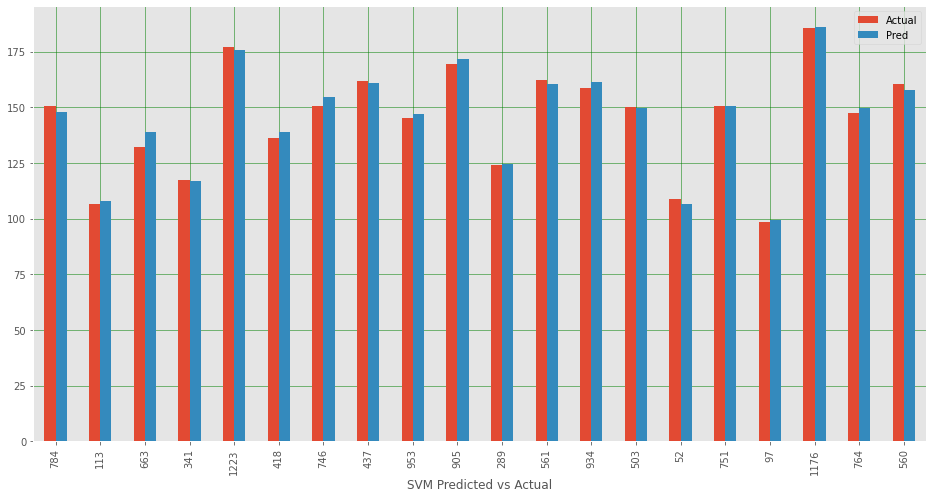

In [30]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

print("Score Accuracy: ", svm_model.score(x_test, y_test))

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_svm_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_svm_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_svm_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_svm_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_svm_pred), 2))

plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("SVM Predicted vs Actual")
plt.show()

In [40]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Get the stock data
df = df = pd.read_csv('AMZN.csv')
# Take a look at the data
print(df)

# Get the Adjusted Close Price 
df = df[['Adj Close']] 

           Date         Open         High          Low        Close  \
0    2019-12-02  1804.400024  1805.550049  1762.680054  1781.599976   
1    2019-12-03  1760.000000  1772.869995  1747.229980  1769.959961   
2    2019-12-04  1774.010010  1789.089966  1760.219971  1760.689941   
3    2019-12-05  1763.500000  1763.500000  1740.000000  1740.479980   
4    2019-12-06  1751.199951  1754.400024  1740.130005  1751.599976   
..          ...          ...          ...          ...          ...   
248  2020-11-24  3100.500000  3134.250000  3086.260010  3118.060059   
249  2020-11-25  3141.870117  3198.000000  3140.260010  3185.070068   
250  2020-11-27  3211.260010  3216.189941  3190.050049  3195.340088   
251  2020-11-30  3208.479980  3228.389893  3125.550049  3168.040039   
252  2020-12-01  3188.500000  3248.949951  3157.179932  3220.080078   

       Adj Close   Volume  
0    1781.599976  3925600  
1    1769.959961  3380900  
2    1760.689941  2670100  
3    1740.479980  2823800  
4    17

In [41]:
# A variable for predicting 'n' days out into the future
forecast_out = 20 #'n=10' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
# print(df.tail())

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
# print(X)

# ### Create the dependent data set (y)  #####
# # Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# # Get all of the y values except the last '30' rows
y = y[:-forecast_out]
# print(y)

# # Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

# # Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

svm_linear = SVR(kernel='linear',)
svm_linear.fit(x_train, y_train)

svm_confidence2 = svm_linear.score(x_test, y_test)
print("linear svm confidence: ", svm_confidence2)

hnn_amazon=KNeighborsRegressor(n_neighbors = 5)
hnn_amazon.fit(x_train,y_train)

print('Knn Confidence', hnn_amazon.score(x_test, y_test))

# # Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# # The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("rbf svm confidence: ", svm_confidence)

# # Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# # The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

linear svm confidence:  0.793673175589624
Knn Confidence 0.9110828900264779
rbf svm confidence:  0.5067684817464231
lr confidence:  0.7902567749251435


In [42]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[3048.409912]
 [3241.159912]
 [3322.      ]
 [3311.370117]
 [3143.73999 ]
 [3035.02002 ]
 [3137.389893]
 [3110.280029]
 [3128.810059]
 [3131.060059]
 [3135.659912]
 [3105.459961]
 [3117.02002 ]
 [3099.399902]
 [3098.389893]
 [3118.060059]
 [3185.070068]
 [3195.340088]
 [3168.040039]
 [3220.080078]]


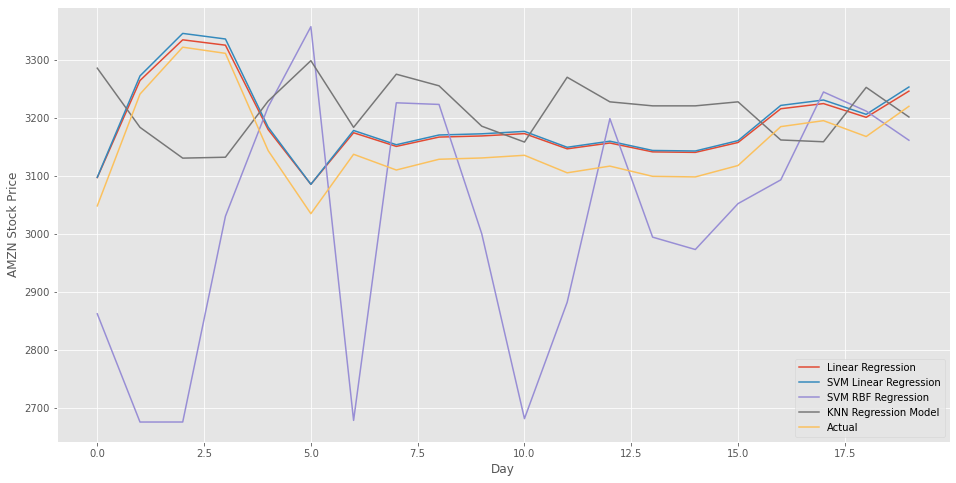

In [43]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
# print(lr_prediction)
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)

amazon_knn_pred=hnn_amazon.predict(x_forecast)

svm_linear_predict = svm_linear.predict(x_forecast)

actual = df[len(df) - forecast_out:].reset_index()['Adj Close']
plot = pd.DataFrame({'Linear Regression': lr_prediction, 'SVM Linear Regression': svm_linear_predict, 'SVM RBF Regression': svm_prediction, 'KNN Regression Model': amazon_knn_pred, 'Actual': actual})
plot.plot(kind='line', figsize=(16,8))
plt.ylabel("AMZN Stock Price")
plt.xlabel("Day")
plt.show()